In [1]:
#### Projeto: Desafio ZAP
#### Programa para Análise Exploratória do Dataset source-4-ds-train.json do ZAP (somente para Apartamentos à Venda)
#### Autor: Rodolfo Bugarin

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter

In [3]:
# Carregar o Dataframe

In [4]:
import pickle

In [5]:
df = pickle.load(open('source-4-ds-train.pickle', 'rb'))

In [6]:
pd.set_option('display.max_columns', 999)  ### para o pandas mostrar mais colunas.

In [7]:
df.head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
0,São Paulo,BR,,-23.612923,-46.614222,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim da...,Jardim da Saúde,São Paulo,Rua Juvenal Galeno,53,,04290030,Zona Sul,3.0,4.0,2017-02-07T13:21:40Z,"04 dorms sendo 01 suíte e closet, sala de esta...",787c7bd19d,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,6.0,SALE,NaN,NaN,700000,NaN,NaN,STANDARD,f4603b2b52,1.0,PRÓXIMO A AVENIDA PRESIDENTE TANCREDO NEVES,388.0,TWO_STORY_HOUSE,2018-12-06T19:27:12.623Z,388.0
1,São Paulo,BR,,-23.643962,-46.593475,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Liviero,Vila Santa Teresa (Zona Sul),São Paulo,Rua Juruaba,16,,04187320,Zona Sul,2.0,3.0,2016-03-21T18:35:17Z,"03 dorms sendo 01 suíte, sala, sala de jantar,...",4d68c0cdbe,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2.0,SALE,NaN,NaN,336000,NaN,NaN,STANDARD,f4603b2b52,1.0,PRÓXIMO A FACULDADE UNIP CAMPUS ANCHIETA,129.0,HOME,2018-12-12T13:17:23.547Z,129.0
2,São Paulo,,,-23.568559,-46.647452,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Cerqueira C...,Bela Vista,São Paulo,Avenida Paulista,402,,01311000,,4.0,0.0,2018-12-18T23:47:03.425Z,"Andar com 395,70m² de área útil, 04 wcs, 05 va...",e7e0b554ac,[http://static.nidoimovel.com.br/d3d9446802a44...,ACTIVE,False,5.0,RENTAL,4900.0,MONTHLY,24929,29829.0,4040.0,STANDARD,501f6d5e94,0.0,Excelente Conjunto Comercial na Av. Paulista,NaN,COMMERCIAL_PROPERTY,NaN,396.0
3,São Paulo,,,-23.598023,-46.682781,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia,Vila Olímpia,São Paulo,Rua Alvorada,1190,,04550004,,2.0,3.0,2018-10-26T16:18:28.915Z,"Viva melhor e de um jeito novo, com privilégio...",6654d93423,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2.0,SALE,686.0,NaN,739643,NaN,1610.0,STANDARD,527c7b0cc0,1.0,"Apartamento com 80m², 2 vagas próximo ao Parqu...",80.0,APARTMENT,2018-11-08T16:38:35.434Z,80.0
4,São Paulo,,,-23.582497,-46.653027,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Paraiso,Paraíso,São Paulo,Rua Curitiba,380,,04005030,,5.0,4.0,2018-12-14T18:06:51.342Z,Sua área é ocupada majoritariamente por instit...,9ffaf676ae,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,5.0,SALE,6230.0,NaN,7520099,NaN,18900.0,STANDARD,527c7b0cc0,4.0,"Apartamento 332m², 4 suítes à venda próximo ao...",332.0,APARTMENT,2018-12-14T18:06:55.140Z,3322.0


In [8]:
df.shape

(133964, 37)

In [9]:
df.drop(df[df['pricinginfos_businesstype'] == 'RENTAL'].index, inplace = True) 

In [10]:
df.drop(df[df['unittypes'] != 'APARTMENT'].index, inplace = True) 

In [11]:
df.shape

(64146, 37)

In [12]:
# Análise de Missings

In [13]:
features = df.columns.tolist()[0:]

In [14]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

address_city    :    0
address_country    :    0
address_district    :    0
address_geolocation_location_lat    :    5
address_geolocation_location_lon    :    5
address_geolocation_precision    :    5
address_locationid    :    0
address_neighborhood    :    0
address_state    :    0
address_street    :    0
address_streetnumber    :    0
address_unitnumber    :    0
address_zipcode    :    0
address_zone    :    0
bathrooms    :    1
bedrooms    :    0
createdat    :    0
description    :    0
id    :    0
images    :    0
listingstatus    :    0
owner    :    0
parkingspaces    :    1128
pricinginfos_businesstype    :    0
pricinginfos_monthlycondofee    :    3630
pricinginfos_period    :    63808
pricinginfos_price    :    0
pricinginfos_rentaltotalprice    :    64064
pricinginfos_yearlyiptu    :    9587
publicationtype    :    0
publisherid    :    0
suites    :    5636
title    :    0
totalareas    :    24956
unittypes    :    0
updatedat    :    2905
usableareas    :    8


In [15]:
df[df.pricinginfos_price >= 0].pricinginfos_price.count() # Verificando que todos os imóveis tem preço de venda

64146

In [16]:
# Análise de Frequencia de variáveis categóricas

In [17]:
df.groupby('address_city').address_city.count()

address_city
São Paulo    64146
Name: address_city, dtype: int64

In [18]:
df.groupby('address_country').address_country.count()

address_country
      58242
BR     5904
Name: address_country, dtype: int64

In [19]:
df.groupby('address_district').address_district.count()

address_district
           64143
Jaraguá        3
Name: address_district, dtype: int64

In [20]:
df.groupby('address_geolocation_precision').address_geolocation_precision.count()

address_geolocation_precision
APPROXIMATE            2945
GEOMETRIC_CENTER      18477
NO_GEOCODE               16
RANGE_INTERPOLATED     6043
ROOFTOP               36660
Name: address_geolocation_precision, dtype: int64

In [21]:
df.groupby('address_locationid').address_locationid.count()

address_locationid
BR>Sao Paulo>NULL>Diadema>Barrios>Taboao                                                              1
BR>Sao Paulo>NULL>Guaruja>Barrios>Enseada                                                             1
BR>Sao Paulo>NULL>Osasco>Barrios>Cidade Sao Francisco                                                 4
BR>Sao Paulo>NULL>Osasco>Barrios>Novo Osasco                                                          1
BR>Sao Paulo>NULL>Osasco>Barrios>Veloso                                                               1
BR>Sao Paulo>NULL>Osasco>Barrios>Vila Yara                                                            1
BR>Sao Paulo>NULL>Sao Paulo                                                                          34
BR>Sao Paulo>NULL>Sao Paulo>Centro>Aclimacao                                                        511
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bela Vista                                                      1191
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bixiga    

In [22]:
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==True].groupby('address_locationid').address_locationid.count()

address_locationid
BR>Sao Paulo>NULL>Sao Paulo>Centro>Aclimacao                                                        511
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bela Vista                                                      1191
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bixiga                                                             1
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bom Retiro                                                        24
BR>Sao Paulo>NULL>Sao Paulo>Centro>Campos Eliseos                                                    67
BR>Sao Paulo>NULL>Sao Paulo>Centro>Caninde                                                            1
BR>Sao Paulo>NULL>Sao Paulo>Centro>Centro                                                           233
BR>Sao Paulo>NULL>Sao Paulo>Centro>Cerqueira Cesar                                                  439
BR>Sao Paulo>NULL>Sao Paulo>Centro>Consolacao                                                       683
BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopol

In [23]:
# Verificando as linhas que o 'address_locationid' que não possuem a expressão "BR>Sao Paulo>NULL>Sao Paulo>"
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==False].address_locationid.count()

44

In [24]:
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==False]

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
1105,São Paulo,BR,,-23.562510,-46.756252,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Osasco>Barrios>Cidade Sao Fr...,Cidade São Francisco,São Paulo,Rua Doutor Hélio Fidélis,,,05351035,Zona Oeste,0.0,3.0,2015-05-10T19:53:37Z,LINDA COBERTURA NA VILA SÃO FRANCISCO COM EXCE...,01531d86fb,[http://wgc.quickfast.com/brilhoimoveis/fotos/...,ACTIVE,False,2.0,SALE,0.0,NaN,546000,NaN,0.0,STANDARD,08df1bf698,1.0,Apartamento em Osasco,0.0,APARTMENT,2018-11-08T13:53:51.022Z,144.0
4130,São Paulo,BR,,-23.506393,-46.723918,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,City América,São Paulo,Avenida Cardeal Motta,397,,05101210,Zona Oeste,1.0,3.0,2018-05-29T14:44:30.670Z,Excelente apartamento com 3 dormitórios (o ter...,5afb652c7a,[http://imobeximg.s3.amazonaws.com/7/131f383b4...,ACTIVE,False,1.0,SALE,567.0,NaN,350000,NaN,0.0,PREMIUM,71670b0bee,0.0,Venda Apartamento 3 Dorm 1 Ban 1 Gar São Paulo SP,0.0,APARTMENT,2018-11-08T14:13:22.626Z,0.0
4694,São Paulo,BR,,-23.614822,-46.747614,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,Super Quadra Morumbi,São Paulo,Rua Diogo Pereira,297,,05750130,,2.0,2.0,2017-10-27T18:28:41.057Z,O apartamento de 63 metros quadrados no bairro...,cb81ac8f15,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2.0,SALE,420.0,NaN,244999,NaN,44.0,STANDARD,c2343cdb4e,1.0,Apartamento para venda possui 63 metros quadra...,63.0,APARTMENT,2018-11-08T15:57:00.898Z,63.0
10332,São Paulo,BR,,-23.583259,-46.771609,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Taboao da Serra>Barrios>Centro,Jardim Boa Vista (Zona Oeste),São Paulo,Rodovia Raposo Tavares,,,05576100,Zona Oeste,2.0,2.0,2017-11-22T17:06:36.932Z,"Apartamento alto padrão, 2 dormitório(s), 2 ba...",0febcc67f6,[https://www.bucalamimoveis.com.br/admin/imove...,ACTIVE,False,1.0,SALE,NaN,NaN,210000,NaN,NaN,STANDARD,c51d69b3dc,1.0,Apartamento alto padrão para venda - Centro,0.0,APARTMENT,2018-12-13T03:27:20.042Z,0.0
10493,São Paulo,,,-23.628961,-46.707797,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,Chácara Santo Antônio (Zona Sul),São Paulo,Rua Fernandes Moreira,1452,,04716003,,1.0,2.0,2018-11-23T14:10:03.462Z,O apartamento tem 61 metros quadrados no bairr...,805a6ff99b,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,1.0,SALE,0.0,NaN,415359,NaN,0.0,STANDARD,c3526e68e6,1.0,Apartamento para venda 61 m² em santo Amaro,61.0,APARTMENT,2019-02-20T23:05:12.255Z,61.0
11693,São Paulo,,,-23.497305,-46.644644,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo,Vila Ester (Zona Norte),São Paulo,Rua Maria Curupaiti,1162,,02452002,,4.0,3.0,2019-02-24T03:17:19.341Z,"Lindo Apartamento andar Alto Face Norte, Sol d...",28aef8e9e2,[https://vr-prod-listings-downloader-images.s3...,ACTIVE,False,2.0,SALE,847.0,MONTHLY,979999,NaN,2884.0,STANDARD,28b9bcbebf,3.0,Lindo Apto Próximo a Braz Leme 03 suites 02 Va...,NaN,APARTMENT,2019-02-24T03:17:52.079Z,132.0
11999,São Paulo,,,-23.544511,-46.691253,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,Jardim Vera Cruz,SP,Rua Euclídes de Andrade,27,,05030030,,2.0,2.0,2019-01-25T22:31:16.726Z,O apartamento está localizado no bairro Jardim...,7f73a49f6c,[https://vr-prod-listings-downloader-images.s3...,ACTIVE,False,1.0,SALE,0.0,MONTHLY,694777,NaN,0.0,STANDARD,156929dfa5,1.0,Apartamento para venda possui 69 metros quadra...,NaN,APARTMENT,2019-01-25T22:31:18.736Z,69.0
12044,São Paulo,,,-23.654965,-46.757453,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,Jardim Germânia,SP,Rua Doutor José Serra Ribeiro,300,PRÓXIMO AO METRÔ CAMPO LIMPO,0

In [25]:
df[df['publicationtype'].str.match('Cen')]

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas


In [26]:
pd.set_option('display.max_rows', 999)  ### para o pandas mostrar mais linhas.

In [27]:
df.groupby('address_neighborhood').address_neighborhood.count()

address_neighborhood
                                                    10
176                                                  3
204                                                  4
A. Pinheiros                                         4
Aclimação                                          391
Aeroporto                                            2
Alto Klabin                                         10
Alto Mandaqui                                        1
Alto da Boa Vista                                   13
Alto da Lapa                                       176
Alto da Mooca                                      285
Alto de Pinheiros                                  240
Alto do Pari                                         7
Altos de Vila Prudente                               2
Aricanduva                                           9
Artur Alvim                                         35
BROOKLIN                                             2
Balneário São Francisco                     

In [28]:
# Identificando os 10 bairros com mais imóveis a venda.
df_temp = pd.DataFrame({'contador' : df.groupby('address_neighborhood').size()}).reset_index()
df_bairro10 = df_temp.nlargest(10, 'contador').reset_index()
df_bairro10 

,index,address_neighborhood,contador
0,175,Higienópolis,1761
1,406,Jardim Paulista,1697
2,708,Santana,1665
3,940,Vila Mariana,1604
4,672,Pinheiros,1586
5,575,Mooca,1394
6,22,Bela Vista,1196
7,181,Indianópolis,1151
8,670,Perdizes,1104
9,40,Campo Belo,1102


In [29]:
df.groupby('address_state').address_state.count()

address_state
                      1
SP                  202
Santa Catarina        1
São Paulo         63942
Name: address_state, dtype: int64

In [30]:
df.groupby('address_street').address_street.count()

address_street
                                                                 2899
9 de Julho                                                          2
Alameda Afonso Schmidt                                             47
Alameda Agenor Couto Magalhães                                      1
Alameda Barros                                                     28
Alameda Barão de Limeira                                           12
Alameda Barão de Piracicaba                                         1
Alameda Campinas                                                   97
Alameda Casa Branca                                                75
Alameda Eduardo Prado                                               2
Alameda Fernão Cardim                                             103
Alameda Franca                                                    197
Alameda Gabriel Monteiro da Silva                                  11
Alameda Glete                                                       9
Alame

In [31]:
# Identificando as 10 ruas com mais imóveis a venda.
df_temp = pd.DataFrame({'contador' : df.groupby('address_street').size()}).reset_index()
df_ruas10 = df_temp.nlargest(10, 'contador').reset_index()
df_ruas10 

,index,address_street,contador
0,0,,2899
1,417,Avenida Raimundo Pereira de Magalhães,304
2,4356,Rua Voluntários da Pátria,296
3,3168,Rua Maranhão,286
4,1149,Rua Bela Cintra,265
5,3674,Rua Piauí,247
6,238,Avenida Higienópolis,231
7,1074,Rua Bahia,228
8,490,Avenida do Guacá,225
9,75,Avenida Angélica,219


In [32]:
df.groupby('address_zipcode').address_zipcode.count()

address_zipcode
            2556
00000000     917
00004269       1
00123101       1
00311800       1
00335050       3
00336010      10
00426001       7
00429500       2
00452090       1
00456900       2
00458000       4
00541100       1
01000000       1
01000001       3
01005020       2
01006020       1
01006030       1
01011100       1
01012010       2
01014010       1
01015060       2
01015070       1
01015080       1
01017000       5
01017010       2
01017904       1
01017905       1
01020000      10
01020001       5
01020002       2
01020010       1
01020030       1
01020050       1
01021          1
01021000       1
01022050       3
01027001       1
01031010       1
01032000       2
01032001      10
01032010       1
01032020       1
01032901       1
01033000       3
01033001       2
01033010      12
01033903       1
01035000       1
01035100       5
01036000       3
01036100       4
01039000       2
01039901       2
01039906       1
01040000       6
01041000       1
01041001       

In [33]:
df.groupby('address_zone').address_zone.count()

address_zone
              56488
Centro         1564
Zona Leste     1185
Zona Norte     1336
Zona Oeste     1039
Zona Sul       2534
Name: address_zone, dtype: int64

In [34]:
# Verificando a consistência (vazio x preenchidos) da informação do campo "Zone" quando o campo "address_locationid" 
# nõo está preenhido com a chave que identifica a cidade de São Paulo.
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==False].groupby('address_zone').address_zone.count()

address_zone
              38
Zona Leste     1
Zona Oeste     5
Name: address_zone, dtype: int64

In [98]:
pd.DataFrame(df.groupby('listingstatus').listingstatus.count())

,listingstatus
listingstatus,
ACTIVE,64146


In [96]:
pd.DataFrame(df.groupby('owner').owner.count())

,owner
owner,
False,64129
True,17


In [37]:
df.groupby('pricinginfos_businesstype').pricinginfos_businesstype.count()

pricinginfos_businesstype
SALE    64146
Name: pricinginfos_businesstype, dtype: int64

In [97]:
pd.DataFrame(df.groupby('pricinginfos_period').pricinginfos_period.count())

,pricinginfos_period
pricinginfos_period,
MONTHLY,338


In [95]:
pd.DataFrame(df.groupby('publicationtype').publicationtype.count())

,publicationtype
publicationtype,
PREMIUM,1019
STANDARD,63127


In [40]:
df.groupby('unittypes').unittypes.count()

unittypes
APARTMENT    64146
Name: unittypes, dtype: int64

In [41]:
# Análise de Variáveis Quantitativas

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

In [45]:
# Estatística descritiva básica dos preços de venda, taxa de condomínio, aluguel e IPTU
df[['pricinginfos_price', 'pricinginfos_monthlycondofee', 'pricinginfos_rentaltotalprice', 'pricinginfos_yearlyiptu']].describe()

,pricinginfos_price,pricinginfos_monthlycondofee,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu
count,"64,146.00","60,516.00",82.00,"54,559.00"
mean,"763,357.45","2,020.19",0.00,933.61
std,"1,047,635.18","107,501.41",0.00,"56,983.66"
min,"10,500.00",0.00,0.00,0.00
25%,"273,000.00",280.00,0.00,0.00
50%,"465,499.00",482.00,0.00,71.00
75%,"858,585.00",886.25,0.00,301.00
max,"74,200,000.00","24,430,000.00",0.00,"10,367,000.00"


In [46]:
# Verificando os 5 maiores preços de venda
df.sort_values(by=['pricinginfos_price'], ascending=False).head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
3076,São Paulo,,,-23.57,-46.66,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Pa...,Jardim Paulista,São Paulo,Alameda Campinas,,,01404001,,2.00,3.00,2014-10-14T14:34:48Z,"APARTAMENTO REFORMADO RECENTEMENTE, 190m, 3 D...",603c42bca6,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2.00,SALE,"1,260.00",NaN,"74,200,000.00",nan,350.00,STANDARD,3b4a8e6e45,1.00,APARTAMENTO NO JARDINS,190.00,APARTMENT,2018-11-08T14:29:53.246Z,190.00
127239,São Paulo,,,-23.54,-46.58,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Leste>Tatuape,Tatuapé,São Paulo,Rua Filipe Camarão,,,03065000,,2.00,1.00,2018-01-03T03:18:11.763Z,"Viva a 250 metros do metro Tatuapé, a 200 metr...",1c5afab5f5,[http://images.ingaiasites.com.br/34bAzrCWbMXZ...,ACTIVE,False,1.00,SALE,0.00,NaN,"25,434,920.00",nan,0.00,STANDARD,015d5292af,1.00,"Apartamento residencial à venda, Tatuapé, São ...",48.00,APARTMENT,2019-02-14T05:32:15.320Z,48.00
91017,São Paulo,,,-23.59,-46.67,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Nova...,Vila Nova Conceição,São Paulo,Praça Pereira Coutinho,71,,04510010,,6.00,4.00,2018-03-29T04:17:46.592Z,"cobertura duplex.. 4 suites...sala intima, sal...",c4800be583,[http://media.newcore.com.br/images/apartament...,ACTIVE,False,10.00,SALE,"1,313.00",NaN,"22,400,000.00",nan,"67,200.00",STANDARD,e8dc040d2d,4.00,Apartamento para venda Vila Nova Conceição 4 d...,822.00,APARTMENT,2019-02-21T07:49:00.413Z,822.00
95777,São Paulo,,,-23.59,-46.67,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Nova...,Vila Nova Conceição,São Paulo,Praça Pereira Coutinho,,,04510010,,5.00,3.00,2017-07-29T05:14:20.567Z,VILA NOVA CONCEIÇÃO APARTAMENTO 3 Dormitórios ...,612d4508ca,[http://images.homologacao.basisnet.com.br/12/...,ACTIVE,False,6.00,SALE,"6,779.00",NaN,"20,720,000.00",nan,"3,954.00",STANDARD,846f37e9ac,3.00,APARTAMENTO VILA NOVA CONCEIÇÃO 539 M²,nan,APARTMENT,2019-02-08T21:27:41.429Z,539.00
91458,São Paulo,,,-23.58,-46.69,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Jardim ...,Jardim Europa,São Paulo,Rua Frederic Chopin,240,,01454030,,6.00,4.00,2018-09-04T14:33:38.265Z,Cobertura duplex à venda com 870 m² de área út...,c6880d78c1,[http://static.nidoimovel.com.br/c3c59e5f8b3e9...,ACTIVE,False,8.00,SALE,"9,100.00",NaN,"19,950,000.00",nan,"4,550.00",STANDARD,48caa55c81,4.00,"Cobertura altíssimo padrão, Edificio Saint Pat...",nan,APARTMENT,2019-02-24T07:35:29.684Z,870.00


In [47]:
# Comparando alguns imóveis na Alameda Campinas.
df.loc[df.address_street == 'Alameda Campinas'].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
534,São Paulo,BR,,-23.57,-46.66,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Pa...,Jardim Paulista,São Paulo,Alameda Campinas,,,01404002,Zona Sul,0.00,2.00,2018-07-20T01:09:23.533Z,Lindo Apartamento&lt;br&gt;&lt;br&gt;&lt;br&gt...,5b9615dd01,[http://lh3.googleusercontent.com/b-1YMNJ0myB8...,ACTIVE,False,1.00,SALE,595.00,NaN,"489,999.00",nan,149.00,STANDARD,8ce6284ee4,1.00,"Apartamento residencial à venda, Jardim Paulis...",51.00,APARTMENT,2018-11-08T13:55:27.619Z,51.00
871,São Paulo,BR,,-23.57,-46.66,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Pa...,Jardim Paulista,São Paulo,Alameda Campinas,,,01404200,Zona Sul,0.00,2.00,2017-10-18T14:45:01.241Z,"Excelente apartamento nos Jardins, próximo à A...",309dfe0415,[https://multimidia.lopes.com.br/462/170-IM278...,ACTIVE,False,2.00,SALE,909.00,NaN,"647,500.00",nan,183.00,STANDARD,0ec61496e4,0.00,Apartamento-São Paulo-Jardim Paulista | Ref.: ...,59.00,APARTMENT,2018-11-08T16:08:10.059Z,59.00
1802,São Paulo,BR,,-23.57,-46.66,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardins,Jardim Paulista,São Paulo,Alameda Campinas,,,01404002,Zona Sul,0.00,2.00,2017-06-03T06:08:39.090Z,Lindo Apartamento reformado Mobiliado pronto p...,839b29d285,[http://images.ingaiasites.com.br/b7nXo2pTA3rg...,ACTIVE,False,1.00,SALE,700.00,NaN,"923,999.00",nan,140.00,STANDARD,52054819a2,2.00,"Apartamento residencial à venda, Jardins, São ...",110.00,APARTMENT,2018-11-08T16:24:27.451Z,110.00
3076,São Paulo,,,-23.57,-46.66,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Pa...,Jardim Paulista,São Paulo,Alameda Campinas,,,01404001,,2.00,3.00,2014-10-14T14:34:48Z,"APARTAMENTO REFORMADO RECENTEMENTE, 190m, 3 D...",603c42bca6,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2.00,SALE,"1,260.00",NaN,"74,200,000.00",nan,350.00,STANDARD,3b4a8e6e45,1.00,APARTAMENTO NO JARDINS,190.00,APARTMENT,2018-11-08T14:29:53.246Z,190.00
5816,São Paulo,,,-23.57,-46.65,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Pa...,Jardim Paulista,São Paulo,Alameda Campinas,708,,01404001,,2.00,2.00,2018-09-06T17:57:22.418Z,"Apartamento pronto para morar com 73m², 2 dorm...",7cb7ea3cc4,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,1.00,SALE,679.00,NaN,"833,437.00",nan,"1,610.00",STANDARD,527c7b0cc0,1.00,Apartamento à venda com 2 dormitórios pronto p...,73.00,APARTMENT,2018-11-08T16:38:35.434Z,73.00


In [48]:
df.loc[df.address_street == 'Alameda Campinas'].address_street.count()

97

In [49]:
# Verficando limites para outliers e medianaspricinginfos_businesstype
features = ['pricinginfos_price', 'pricinginfos_monthlycondofee', 'pricinginfos_rentaltotalprice', 'pricinginfos_yearlyiptu']

for i in features:
    mediana = df[i].median()
    p99 = np.nanpercentile(df[i], q=99.9)
    print('{:>29}'.format(i), ": mediana: {:,.2f}".format(mediana), "--- p99: {:,.2f}".format(p99))

           pricinginfos_price : mediana: 465,499.00 --- p99: 12,600,000.00
 pricinginfos_monthlycondofee : mediana: 482.00 --- p99: 91,618.38
pricinginfos_rentaltotalprice : mediana: 0.00 --- p99: 0.00
      pricinginfos_yearlyiptu : mediana: 71.00 --- p99: 66,854.00


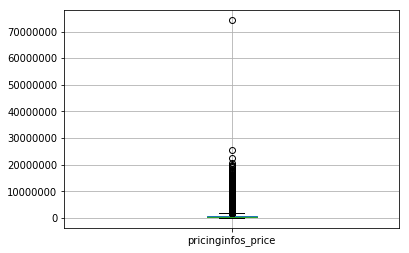

In [50]:
plt.ticklabel_format(useOffset=False, style='plain')
df.boxplot(column=['pricinginfos_price'] )

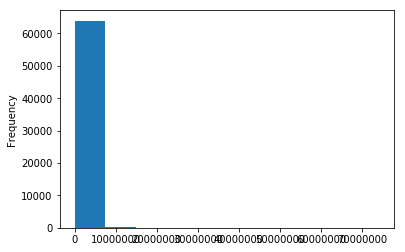

In [51]:
plt.ticklabel_format(useOffset=False, style='plain')
df.pricinginfos_price.plot.hist()

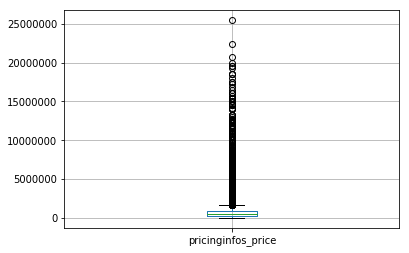

In [52]:
# Verificando o boxplot sem o maior outlier no pricinginfos_price
v_id = df.loc[df['pricinginfos_price'].idxmax(), 'id']
df_temp = df.loc[df.id != v_id]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['pricinginfos_price'] )

In [53]:
df.pricinginfos_price.quantile([0.25,0.5,0.75,1])

0.25      273,000.00
0.50      465,499.00
0.75      858,585.00
1.00   74,200,000.00
Name: pricinginfos_price, dtype: float64

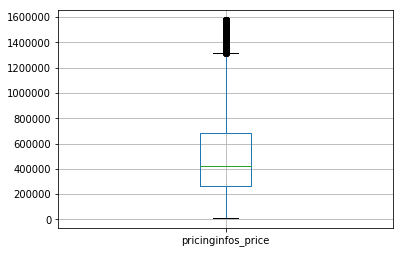

In [54]:
# Verificando o boxplot sem os 10% mais altos outliers de pricinginfos_price
p90 = np.nanpercentile(df['pricinginfos_price'], q=90)
df_temp = df.loc[df.pricinginfos_price <= p90]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['pricinginfos_price'] )

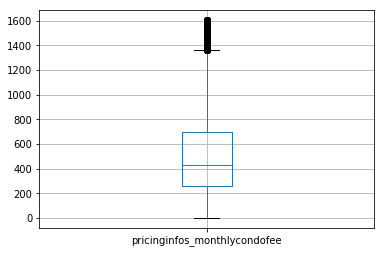

In [55]:
# Verificando o boxplot de taxa de condomínio sem os 10% mais altos outliers de pricinginfos_monthlycondofee
p90 = np.nanpercentile(df['pricinginfos_monthlycondofee'], q=90)
df_temp = df.loc[df.pricinginfos_monthlycondofee <= p90]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['pricinginfos_monthlycondofee'] )

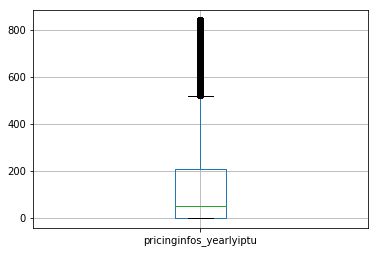

In [56]:
# Verificando o boxplot de IPTU sem os 10% mais altos outliers de pricinginfos_yearlyiptu
p90 = np.nanpercentile(df['pricinginfos_yearlyiptu'], q=90)
df_temp = df.loc[df.pricinginfos_yearlyiptu <= p90]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['pricinginfos_yearlyiptu'] )

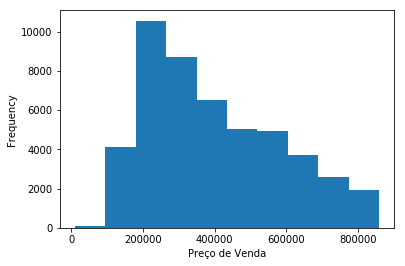

In [57]:
# Verificando o histograma sem os 25% mais altos outliers de pricinginfos_price
p75 = np.nanpercentile(df['pricinginfos_price'], q=75)
df_temp = df.loc[df.pricinginfos_price <= p75]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Preço de Venda')
df_temp.pricinginfos_price.plot.hist()

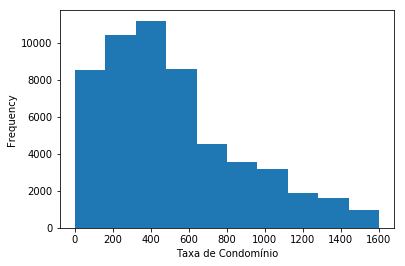

In [58]:
# Verificando o histograma sem os 10% mais altos outliers de pricinginfos_monthlycondofee
p90 = np.nanpercentile(df['pricinginfos_monthlycondofee'], q=90)
df_temp = df.loc[df.pricinginfos_monthlycondofee <= p90]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Taxa de Condomínio')
df_temp.pricinginfos_monthlycondofee.plot.hist()

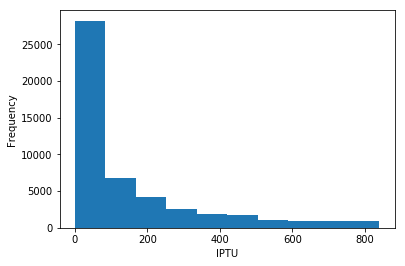

In [59]:
# Verificando o histograma sem os 10% mais altos outliers de pricinginfos_yearlyiptu
p90 = np.nanpercentile(df['pricinginfos_yearlyiptu'], q=90)
df_temp = df.loc[df.pricinginfos_yearlyiptu <= p90]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('IPTU')
df_temp.pricinginfos_yearlyiptu.plot.hist()

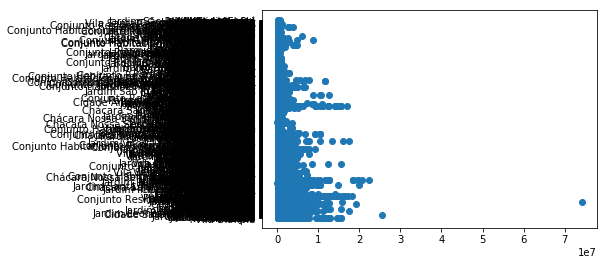

In [60]:
# Distribuição do preço de venda por bairro.
plt.scatter(df.pricinginfos_price, df.address_neighborhood)
plt.show()

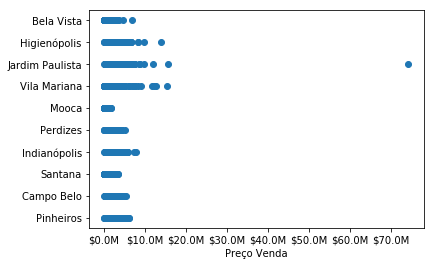

In [61]:
# Distribuição do preço de venda por bairro para os 10 bairros com mais imóveis à venda.
list_bairros = df_bairro10.address_neighborhood.tolist()
df_temp = df[df['address_neighborhood'].isin(list_bairros)]
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos:'$%1.1fM' % (x*1e-6)))
plt.xlabel("Preço Venda")
plt.scatter(df_temp.pricinginfos_price, df_temp.address_neighborhood)
plt.show()

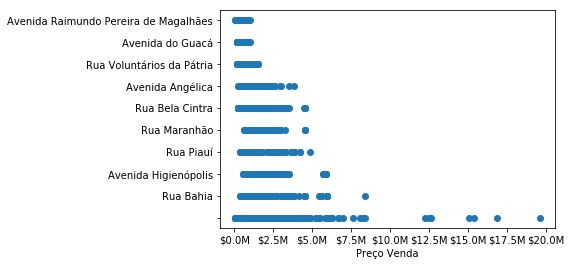

In [62]:
# Distribuição do preço de venda por rua para as 10 ruas com mais imóveis à venda.
list_ruas = df_ruas10.address_street.tolist()
df_temp = df[df['address_street'].isin(list_ruas)].sort_values(by='pricinginfos_price', ascending=False)
#plt.ticklabel_format(useOffset=False, style='plain')
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos:'$%1.1fM' % (x*1e-6)))
plt.xlabel("Preço Venda")
plt.scatter(df_temp.pricinginfos_price, df_temp.address_street)
plt.show()

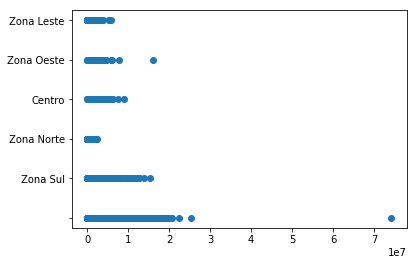

In [63]:
# Distribuição do preço de venda por Zona
plt.scatter(df.pricinginfos_price, df.address_zone)
plt.show()

In [64]:
# Estatística descritiva básica das caracterísicas quantitativas dos imóveis
df[['bathrooms', 'bedrooms', 'suites', 'parkingspaces', 'totalareas', 'usableareas']].describe()

,bathrooms,bedrooms,suites,parkingspaces,totalareas,usableareas
count,"64,145.00","64,146.00","58,510.00","63,018.00","39,190.00","64,138.00"
mean,2.26,2.58,1.17,1.75,"30,131.38",116.33
std,1.66,0.85,1.13,1.52,"5,615,740.39",631.95
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.00,1.00,56.00,59.00
50%,2.00,3.00,1.00,1.00,86.00,82.00
75%,3.00,3.00,1.00,2.00,163.00,135.00
max,99.00,30.00,23.00,215.00,"1,111,111,111.00","129,000.00"


In [65]:
# Verficando limites para outliers e medianas
features = ['bathrooms', 'bedrooms', 'suites', 'parkingspaces', 'totalareas', 'usableareas']

for i in features:
    mediana = df[i].median()
    p99 = np.nanpercentile(df[i], q=99.9)
    print('{:>13}'.format(i), ": mediana: {:,.2f}".format(mediana), "--- p99: {:,.2f}".format(p99))

    bathrooms : mediana: 2.00 --- p99: 8.00
     bedrooms : mediana: 3.00 --- p99: 5.00
       suites : mediana: 1.00 --- p99: 5.00
parkingspaces : mediana: 1.00 --- p99: 8.00
   totalareas : mediana: 86.00 --- p99: 16,175.99
  usableareas : mediana: 82.00 --- p99: 754.86


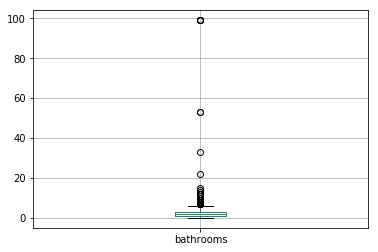

In [66]:
df.boxplot(column=['bathrooms'] )

In [67]:
df.groupby('bathrooms').bathrooms.count()

bathrooms
0.00      2053
1.00     21985
2.00     18601
3.00      9308
4.00      5803
5.00      4512
6.00      1609
7.00       195
8.00        48
9.00        13
10.00        1
11.00        1
12.00        5
13.00        1
14.00        1
15.00        1
22.00        1
33.00        1
53.00        2
99.00        4
Name: bathrooms, dtype: int64

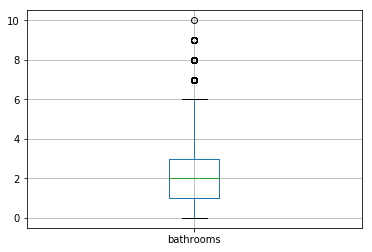

In [68]:
# Verificando o boxplot dos imóveis com até 10 bathrooms
df_temp = df.loc[df.bathrooms <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['bathrooms'] )

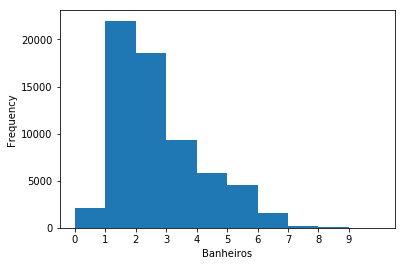

In [69]:
# Verificando o histograma dos imóveis com até 10 bathrooms
df_temp = df.loc[df.bathrooms <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(10))
plt.xlabel('Banheiros')
df_temp.bathrooms.plot.hist()

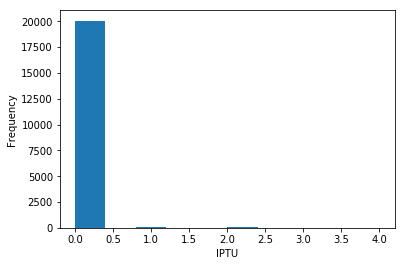

In [70]:
# Verificando o histograma sem os 25% mais altos outliers de pricinginfos_yearlyiptu
p90 = np.nanpercentile(df['bathrooms'], q=90)
df_temp = df.loc[df.pricinginfos_yearlyiptu <= p90]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('IPTU')
df_temp.pricinginfos_yearlyiptu.plot.hist()

In [71]:
df[df.bathrooms >=25].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
5148,São Paulo,BR,,-23.55,-46.65,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Piauí,247,,01241001,Centro,99.00,2.00,2017-09-21T04:51:42.472Z,,547c0dd221,[http://images.ingaiasites.com.br/uPcrknQZvrE9...,ACTIVE,False,0.00,SALE,644.00,NaN,"1,050,000.00",nan,122.00,STANDARD,e196a2927f,1.00,"Apartamento residencial à venda, Higienópolis,...",178.00,APARTMENT,2018-10-27T07:22:56.607Z,178.00
5642,São Paulo,,,-23.65,-46.67,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Mascote,Vila Mascote,São Paulo,Avenida Damasceno Vieira,,,03178200,Zona Sul,53.00,3.00,2016-05-13T06:24:39Z,"COMPLETO, ÓTIMA OPORTUNIDADE, LOCALIZADO NO CO...",9c22d1a4e1,[http://wgc.quickfast.com/imoveisnovaopcao/fot...,ACTIVE,False,nan,SALE,553.00,NaN,"1,050,000.00",nan,0.00,STANDARD,afd2c39bce,3.00,Apartamento em São Paulo,nan,APARTMENT,2018-11-12T13:08:44.259Z,154.00
22853,São Paulo,BR,,-23.61,-46.68,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Brooklin,Brooklin Novo,São Paulo,Rua Nebraska,420,,04560011,Zona Sul,33.00,4.00,2018-09-28T01:36:07.799Z,"Bem localizado em meio ao ""burburinho"" do Broo...",3afd269604,[http://images.ingaiasites.com.br/lCiATX00Y9Nx...,ACTIVE,False,3.00,SALE,"1,470.00",NaN,"910,000.00",nan,0.00,STANDARD,8ce7f22dd6,1.00,Brooklin apartamento a Venda 1 por Andar 3 Qua...,121.00,APARTMENT,2018-11-20T00:31:42.874Z,121.00
52422,São Paulo,BR,,-23.54,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Rio de Janeiro,321,,01240010,Centro,99.00,3.00,2017-09-21T04:53:39.352Z,,b789ac42a3,[http://images.ingaiasites.com.br/YWjJZnuruBpV...,ACTIVE,False,1.00,SALE,"1,610.00",NaN,"1,400,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Higienópolis,...",250.00,APARTMENT,2018-10-27T07:28:36.207Z,250.00
56724,São Paulo,BR,,-23.54,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Rio de Janeiro,321,,01240010,Centro,99.00,3.00,2017-09-21T04:53:22.072Z,APTO C/ TACOS E ARMS. - 26/10/2018,ce118da390,[http://images.ingaiasites.com.br/JCU8U15ZFAQ5...,ACTIVE,False,1.00,SALE,"1,819.00",NaN,"1,372,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Higienópolis,...",216.00,APARTMENT,2018-10-27T07:37:27.168Z,216.00


In [72]:
df[df.bathrooms >=75].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
5148,São Paulo,BR,,-23.55,-46.65,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Piauí,247,,01241001,Centro,99.00,2.00,2017-09-21T04:51:42.472Z,,547c0dd221,[http://images.ingaiasites.com.br/uPcrknQZvrE9...,ACTIVE,False,0.00,SALE,644.00,NaN,"1,050,000.00",nan,122.00,STANDARD,e196a2927f,1.00,"Apartamento residencial à venda, Higienópolis,...",178.00,APARTMENT,2018-10-27T07:22:56.607Z,178.00
52422,São Paulo,BR,,-23.54,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Rio de Janeiro,321,,01240010,Centro,99.00,3.00,2017-09-21T04:53:39.352Z,,b789ac42a3,[http://images.ingaiasites.com.br/YWjJZnuruBpV...,ACTIVE,False,1.00,SALE,"1,610.00",NaN,"1,400,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Higienópolis,...",250.00,APARTMENT,2018-10-27T07:28:36.207Z,250.00
56724,São Paulo,BR,,-23.54,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Rio de Janeiro,321,,01240010,Centro,99.00,3.00,2017-09-21T04:53:22.072Z,APTO C/ TACOS E ARMS. - 26/10/2018,ce118da390,[http://images.ingaiasites.com.br/JCU8U15ZFAQ5...,ACTIVE,False,1.00,SALE,"1,819.00",NaN,"1,372,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Higienópolis,...",216.00,APARTMENT,2018-10-27T07:37:27.168Z,216.00
64374,São Paulo,BR,,-23.55,-46.65,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Piauí,247,,01241001,Centro,99.00,3.00,2017-09-21T04:54:04.356Z,,730649db76,[http://images.ingaiasites.com.br/YDb8wWh86uWz...,ACTIVE,False,1.00,SALE,630.00,NaN,"1,064,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Bairro inváli...",230.00,APARTMENT,2018-10-27T07:25:24.494Z,230.00


In [73]:
df[df.bathrooms >=200].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas


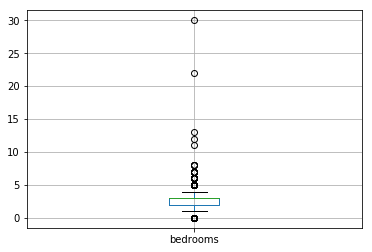

In [74]:
df.boxplot(column=['bedrooms'] )

In [75]:
df.groupby('bedrooms').bedrooms.count()

bedrooms
0.00       116
1.00      5471
2.00     24142
3.00     26519
4.00      7609
5.00       245
6.00        27
7.00         8
8.00         4
11.00        1
12.00        1
13.00        1
22.00        1
30.00        1
Name: bedrooms, dtype: int64

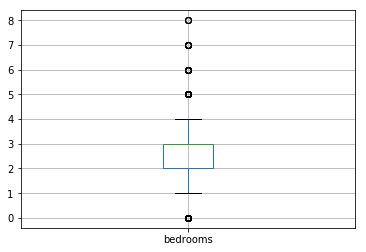

In [76]:
# Verificando o boxplot dos imóveis com até 10 bedrooms
df_temp = df.loc[df.bedrooms <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['bedrooms'] )

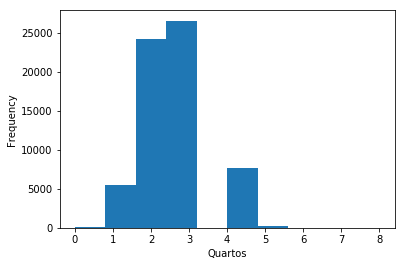

In [77]:
# Verificando o histograma dos imóveis com até 10 bedrooms
df_temp = df.loc[df.bedrooms <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(10))
plt.xlabel('Quartos')
df_temp.bedrooms.plot.hist()

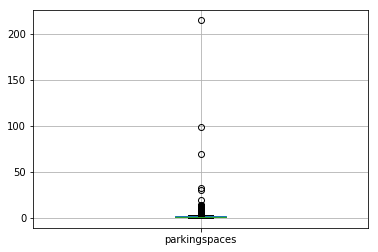

In [78]:
df.boxplot(column=['parkingspaces'] )

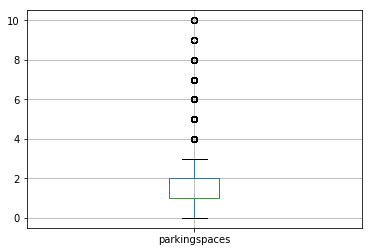

In [79]:
# Verificando o boxplot dos imóveis com até 10 parkingspaces
df_temp = df.loc[df.parkingspaces <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['parkingspaces'] )

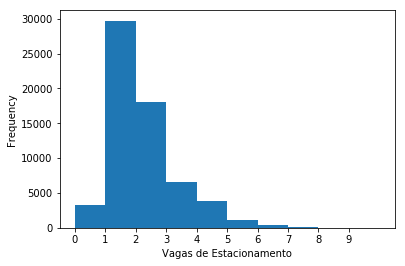

In [80]:
# Verificando o histograma dos imóveis com até 10 parkingspaces
df_temp = df.loc[df.parkingspaces <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(10))
plt.xlabel('Vagas de Estacionamento')
df_temp.parkingspaces.plot.hist()

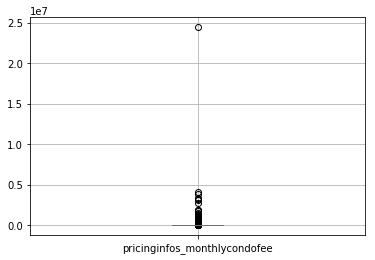

In [81]:
df.boxplot(column=['pricinginfos_monthlycondofee'] )

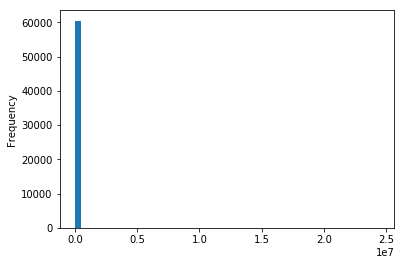

In [82]:
df.pricinginfos_monthlycondofee.plot.hist(bins=50)

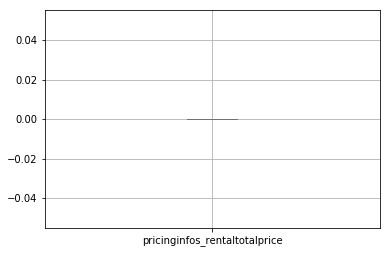

In [83]:
df.boxplot(column=['pricinginfos_rentaltotalprice'] )

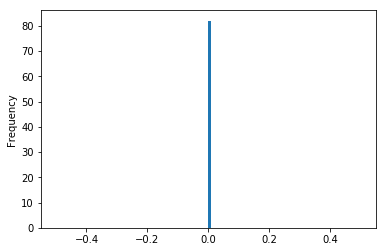

In [84]:
df.pricinginfos_rentaltotalprice.plot.hist(bins=100)

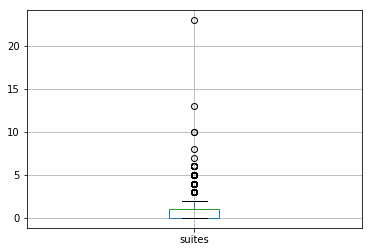

In [85]:
df.boxplot(column=['suites'] )

In [86]:
df.groupby('suites').suites.count()

suites
0.00     17212
1.00     26697
2.00      4970
3.00      6746
4.00      2768
5.00       104
6.00         7
7.00         1
8.00         1
10.00        2
13.00        1
23.00        1
Name: suites, dtype: int64

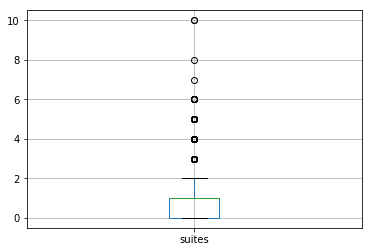

In [87]:
# Verificando o boxplot dos imóveis com até 10 suites
df_temp = df.loc[df.suites <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['suites'] )

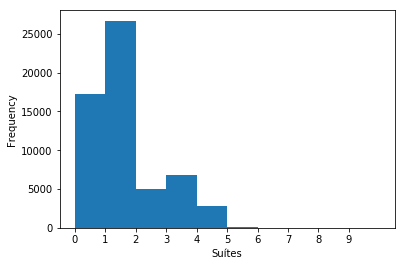

In [88]:
# Verificando o histograma dos imóveis com até 10 suites
df_temp = df.loc[df.suites <= 10]
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(10))
plt.xlabel('Suítes')
df_temp.suites.plot.hist()

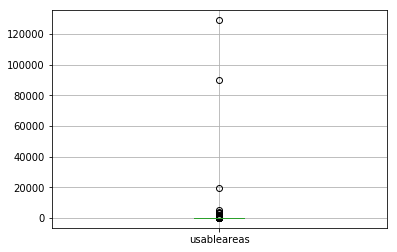

In [89]:
df.boxplot(column=['usableareas'] )

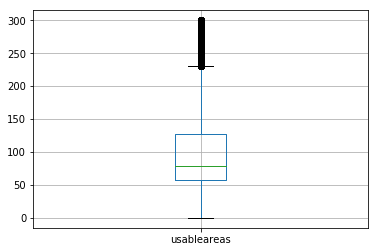

In [90]:
# Verificando o boxplot dos imóveis com até 300 m2 de usableareas
df_temp = df.loc[df.usableareas <= 300]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['usableareas'] )

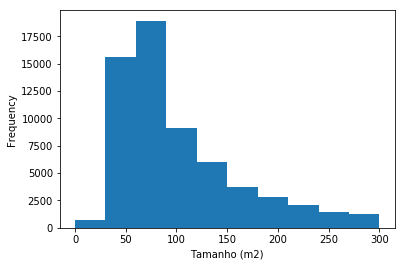

In [91]:
# Verificando o histograma dos imóveis com a mesma metragem
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Tamanho (m2)')
df_temp.usableareas.plot.hist()

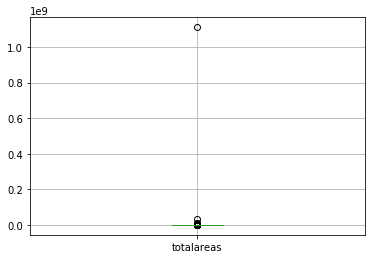

In [92]:
df.boxplot(column=['totalareas'] )

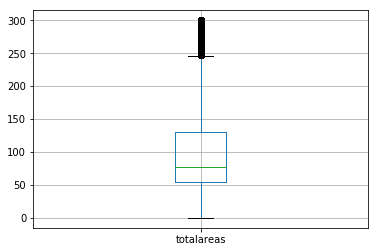

In [93]:
# Verificando o boxplot dos imóveis com até 300 m2 de totalareas
df_temp = df.loc[df.totalareas <= 300]
plt.ticklabel_format(useOffset=False, style='plain')
df_temp.boxplot(column=['totalareas'] )

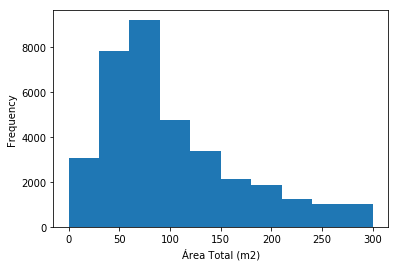

In [94]:
# Verificando o histograma dos imóveis com a mesma metragem de área total
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Área Total (m2)')
df_temp.totalareas.plot.hist()

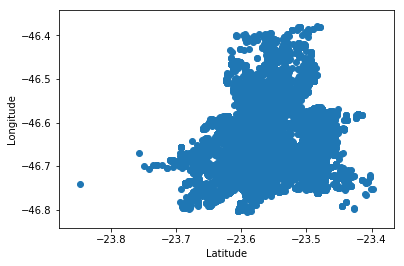

In [102]:
# Distribuição dos imóveis por Latitude x Longitude
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(df.address_geolocation_location_lat, df.address_geolocation_location_lon)
plt.show()

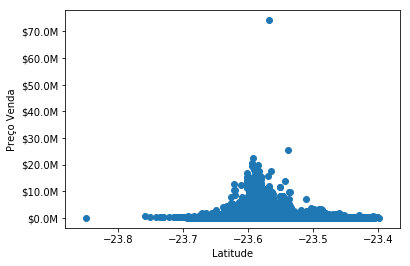

In [116]:
# Distribuição dos imóveis por Latitude x Preço de Venda
fig, ax = plt.subplots()
plt.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:'$%1.1fM' % (x*1e-6)))
plt.xlabel('Latitude')
plt.ylabel('Preço Venda')
ax.scatter(df.address_geolocation_location_lat, df.pricinginfos_price)
plt.show()

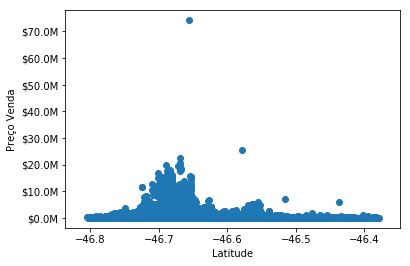

In [117]:
# Distribuição dos imóveis por Longitude x Preço de Venda
fig, ax = plt.subplots()
plt.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:'$%1.1fM' % (x*1e-6)))
plt.xlabel('Latitude')
plt.ylabel('Preço Venda')
ax.scatter(df.address_geolocation_location_lon, df.pricinginfos_price)
plt.show()

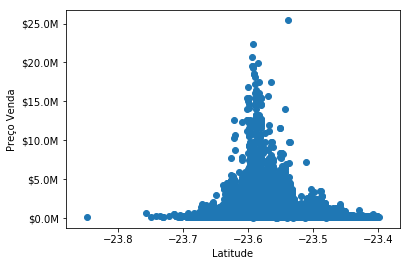

In [118]:
# Distribuição dos imóveis por Latitude x Preço de Venda sem o maior Outlier
v_id = df.loc[df['pricinginfos_price'].idxmax(), 'id']
df_temp = df.loc[df.id != v_id]
fig, ax = plt.subplots()
plt.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:'$%1.1fM' % (x*1e-6)))
plt.xlabel('Latitude')
plt.ylabel('Preço Venda')
ax.scatter(df_temp.address_geolocation_location_lat, df_temp.pricinginfos_price)
plt.show()

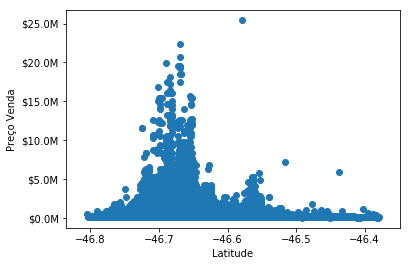

In [119]:
# Distribuição dos imóveis por Longitude x Preço de Venda sem o maior Outlier
v_id = df.loc[df['pricinginfos_price'].idxmax(), 'id']
df_temp = df.loc[df.id != v_id]
fig, ax = plt.subplots()
plt.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:'$%1.1fM' % (x*1e-6)))
plt.xlabel('Latitude')
plt.ylabel('Preço Venda')
ax.scatter(df_temp.address_geolocation_location_lon, df_temp.pricinginfos_price)
plt.show()

In [128]:
df.loc[df.pricinginfos_price >= 15000000].pricinginfos_price.count()

29

In [129]:
df.loc[df.pricinginfos_price >= 15000000, ['pricinginfos_price', 'address_geolocation_location_lat', 'address_geolocation_location_lon']]

,pricinginfos_price,address_geolocation_location_lat,address_geolocation_location_lon
3076,"74,200,000.00",-23.57,-46.66
8123,"16,099,999.00",-23.58,-46.69
25783,"16,870,000.00",-23.60,-46.70
34742,"15,679,999.00",-23.57,-46.65
42242,"15,399,999.00",-23.58,-46.65
81388,"15,011,989.00",-23.59,-46.68
81918,"18,550,000.00",-23.59,-46.67
82480,"19,600,000.00",-23.59,-46.67
83347,"15,399,999.00",-23.58,-46.65
84123,"19,250,000.00",-23.59,-46.67
